### Heather Lemon 
COMP 4449 - MidTerm Project

Vocabulary [0]
In our featuresDF there are 15 features.
Features DF - id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
* id - spotify id of song
* name - name of song
* artists - song artist
* dancability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* key signature - The key the track is in. Integers map to pitches using standard Pitch Class notation.[1] E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* duration_ms - song length in milliseconds
* time_signature - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

* Mood: Danceability, Valence, Energy, Tempo
* Properties: Loudness, Speechiness, Instrumentalness
* Context: Liveness, Acousticness

spotify_ranking_1.csv - Details 

There are 7 columns - Position, Track Name, Artist, Streams, URL, Date, Region

* Position - position on chart 
* Track Name - song title
* Artist - Name of musician or group
* Streams - number of streams 
* URL - url link 
* Date - timestamp %Y-%m-%D
* Region - Country Code

link to upstream kaggle code https://www.kaggle.com/datasets/edumucelli/spotifys-worldwide-daily-song-ranking 

In [351]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data Ingest

In [352]:
features_df = pd.read_csv('data/featuresdf.csv')
features_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [353]:
ranking_spotify_1 = pd.read_csv("data/ranking_spotify_1.csv")
print(ranking_spotify_1.shape)
ranking_spotify_1.head()

(931168, 7)


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [354]:
ranking_spotify_2 = pd.read_csv("data/ranking_spotify_2.csv")
print(ranking_spotify_2.shape)
ranking_spotify_2.head()

(928746, 7)


,Position,Track Name,Artist,Streams,URL,Date,Region
0,54,Thunder,Imagine Dragons,5404,https://open.spotify.com/track/0tKcYR2II1VCQWT...,2017-08-24,cr
1,55,"Soy Peor Remix (feat. J Balvin, Ozuna & Arcangel)",Bad Bunny,5339,https://open.spotify.com/track/4UG962ViiLqoUyx...,2017-08-24,cr
2,56,Photograph,Ed Sheeran,5278,https://open.spotify.com/track/6fxVffaTuwjgEk5...,2017-08-24,cr
3,57,Thinking Out Loud,Ed Sheeran,5055,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2017-08-24,cr
4,58,Imitadora,Romeo Santos,4976,https://open.spotify.com/track/6r46lnXFbE9fr2d...,2017-08-24,cr


In [355]:
ranking_spotify_3 = pd.read_csv("data/ranking_spotify_3.csv")
print(ranking_spotify_3.shape)
ranking_spotify_3.head()

(929351, 7)


,Position,Track Name,Artist,Streams,URL,Date,Region
0,193,I'm the One,DJ Khaled,8316,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,2017-11-21,dk
1,194,God Dag,KESI,8298,https://open.spotify.com/track/4Jg4Qp4byYVpJ5m...,2017-11-21,dk
2,195,Castle on the Hill,Ed Sheeran,8293,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,2017-11-21,dk
3,196,September Song,JP Cooper,8278,https://open.spotify.com/track/2Inz7gGPGgieN0C...,2017-11-21,dk
4,197,Mi Gente (feat. Beyoncé),J Balvin,8261,https://open.spotify.com/track/7fwXWKdDNI5IutO...,2017-11-21,dk


In [356]:
ranking_spotify_4 = pd.read_csv("data/ranking_spotify_4.csv")
print(ranking_spotify_4.shape)
ranking_spotify_4.head()

(651932, 7)


,Position,Track Name,Artist,Streams,URL,Date,Region
0,69,There for You,Martin Garrix,8323,https://open.spotify.com/track/6jA8HL9i4QGzsj6...,2017-06-24,co
1,70,Por Fin Te Encontré,Cali Y El Dandee,8312,https://open.spotify.com/track/3GpvoKKWZyTwgbL...,2017-06-24,co
2,71,One Dance,Drake,8306,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-06-24,co
3,72,Sé Que Te Duele,Alejandro Fernandez,8221,https://open.spotify.com/track/5vZfgeDfNhlkKeJ...,2017-06-24,co
4,73,Bad Liar,Selena Gomez,8188,https://open.spotify.com/track/1sCxVKWImDZSZKv...,2017-06-24,co


# Feature Engineering

Select only year 2017

In [357]:
ranking_spotify_1 = ranking_spotify_1[ranking_spotify_1.Date < '2018-01-01']
print(ranking_spotify_1.shape)
ranking_spotify_2 = ranking_spotify_2[ranking_spotify_2.Date < '2018-01-01']
print(ranking_spotify_2.shape)
ranking_spotify_3 = ranking_spotify_3[ranking_spotify_3.Date < '2018-01-01']
print(ranking_spotify_3.shape)
ranking_spotify_4 = ranking_spotify_4[ranking_spotify_4.Date < '2018-01-01']
print(ranking_spotify_4.shape)

(909896, 7)
(906353, 7)
(905480, 7)
(634757, 7)


In [358]:
region = ranking_spotify_1.groupby(by='Region').count()
region

,Position,Track Name,Artist,Streams,URL,Date
Region,,,,,,
ar,72400,72386,72386,72400,72400,72400
cr,46453,46443,46443,46453,46453,46453
ec,72400,72384,72384,72400,72400,72400
ee,12666,12658,12658,12666,12666,12666
fi,72400,72392,72392,72400,72400,72400
fr,72400,72390,72390,72400,72400,72400
it,72400,72384,72384,72400,72400,72400
lt,16536,16528,16528,16536,16536,16536
no,72400,72386,72386,72400,72400,72400


Select only country of USA

Ranking_Spotify data cleaning

In [359]:
ranking_spotify_1 = ranking_spotify_1[ranking_spotify_1.Region == 'us']
ranking_spotify_2 = ranking_spotify_2[ranking_spotify_2.Region == 'us']
ranking_spotify_3 = ranking_spotify_3[ranking_spotify_3.Region == 'us']
ranking_spotify_4 = ranking_spotify_4[ranking_spotify_4.Region == 'us']

In [360]:
print(ranking_spotify_1.shape)
print(ranking_spotify_2.shape)
print(ranking_spotify_3.shape)
print(ranking_spotify_4.shape)

(72400, 7)
(0, 7)
(0, 7)
(0, 7)


This leaves us with 72,400 rows of avaiable data from the +2million songs available. 

Convert ms length to minutes/seconds

In [361]:
features_df.drop('id', inplace=True, axis=1)
features_df.head(1)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0


In [362]:
features_df['duration_minutes'] = features_df['duration_ms'].apply(lambda x: float((x/(1000.0*60))%60))
features_df['duration_minutes'] = features_df['duration_minutes'].astype('float64')
# for some reason it did not like applying round to a calculated float
features_df['duration_minutes'] = features_df['duration_minutes'].apply(lambda x: round(x, 2))

In [363]:
features_df.drop('duration_ms', inplace=True, axis=1)
features_df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,4.0,3.90
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,4.0,3.81
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,4.0,3.80
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,4.0,4.12
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,4.0,4.81


# DataType Check

We will use ranking_spotify_1 from region usa and year 2017.

In [364]:
ranking_spotify_1.dtypes

Position       int64
Track Name    object
Artist        object
Streams        int64
URL           object
Date          object
Region        object
dtype: object

Use a datetimestamp object

In [365]:
ranking_spotify_1.Date = pd.to_datetime(ranking_spotify_1.Date)
ranking_spotify_1.dtypes

Position               int64
Track Name            object
Artist                object
Streams                int64
URL                   object
Date          datetime64[ns]
Region                object
dtype: object

# Null Check

In [366]:
ranking_spotify_1.isnull().sum()

Position       0
Track Name    16
Artist        16
Streams        0
URL            0
Date           0
Region         0
dtype: int64

16/72000 is a small percent, so it is safe to drop the missing values.

In [367]:
ranking_spotify_1.dropna(inplace=True)

In [368]:
ranking_spotify_1.isnull().sum()

Position      0
Track Name    0
Artist        0
Streams       0
URL           0
Date          0
Region        0
dtype: int64

In [369]:
ranking_spotify_1.drop(['URL'], inplace=True, axis=1)

In [370]:
ranking_spotify_1.head(1)

,Position,Track Name,Artist,Streams,Date,Region
771622,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,2017-01-01,us


In [371]:
features_df.head(1)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_minutes
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,4.0,3.9


### Feature DF Cleaning

Type check

In [372]:
features_df.dtypes

name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
duration_minutes    float64
dtype: object

### Null Check on features DF

In [373]:
features_df.isnull().sum()

name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_minutes    0
dtype: int64

# Exploratory Data Analysis

17 features is alot to show on a pairplot so we'll be using a histplot.

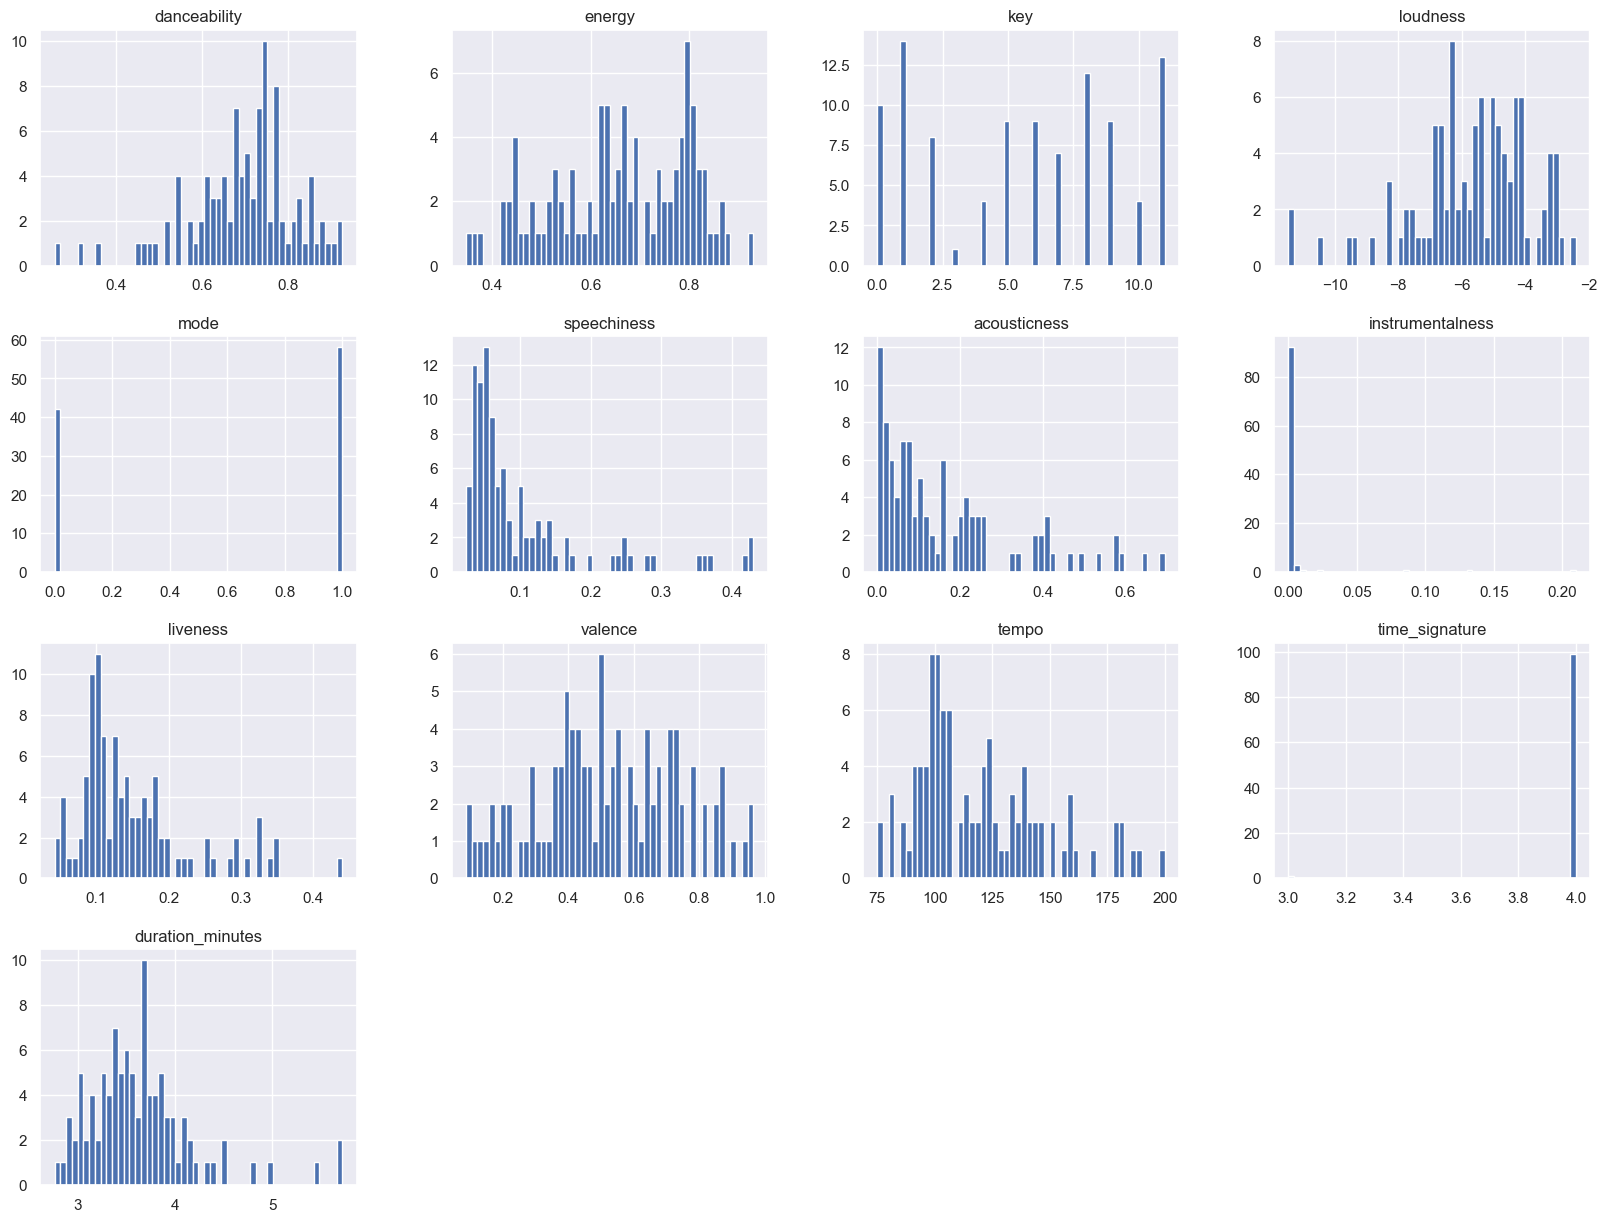

In [374]:
features_df.hist(bins=50, figsize=(20,15));

### Correlation plot of numeric features

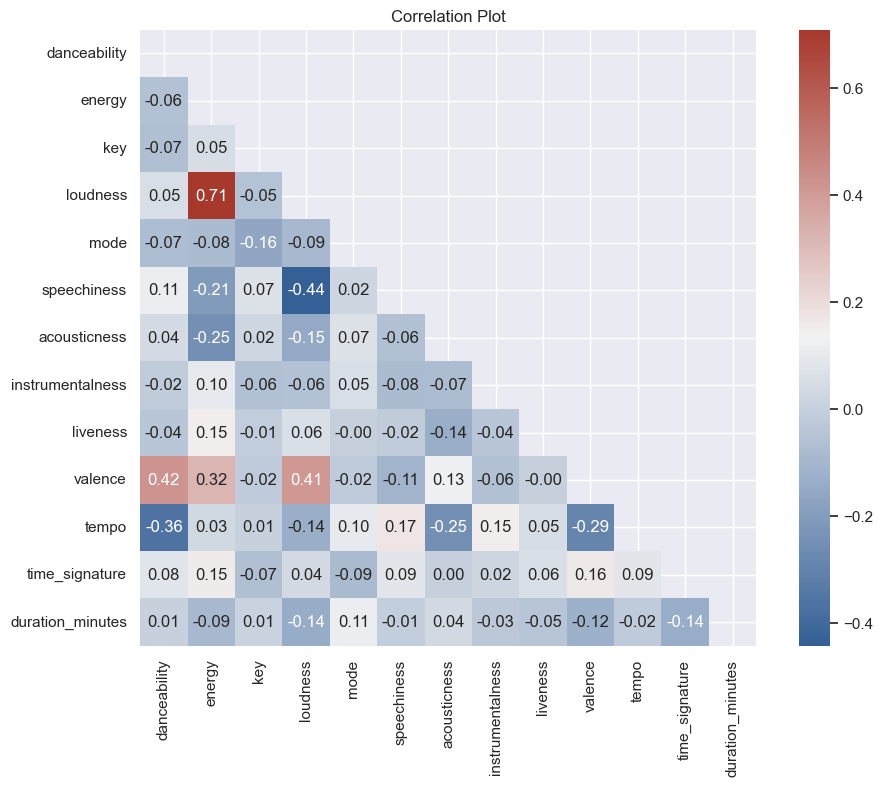

In [375]:
# only show lower portion of plot
sns.set(rc={'figure.figsize':(11,8)})
matrix = features_df.select_dtypes(include=np.number).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
sns.heatmap(matrix, annot=True, mask=mask, square=True, fmt=".2f", cmap=cmap).set(title='Correlation Plot');

Energy and loudness have a strong postive correlation. 
Valance and dancibility, energy and loudness all have a postive correlation. 
Loudness and speechiness have a negative correlation, which makes sense if a song is very loud you likely cannot hear the person singing in the background unless you're talking about death metal :) Surprising note - I expected danceability to have a stronger correlation with loudness.

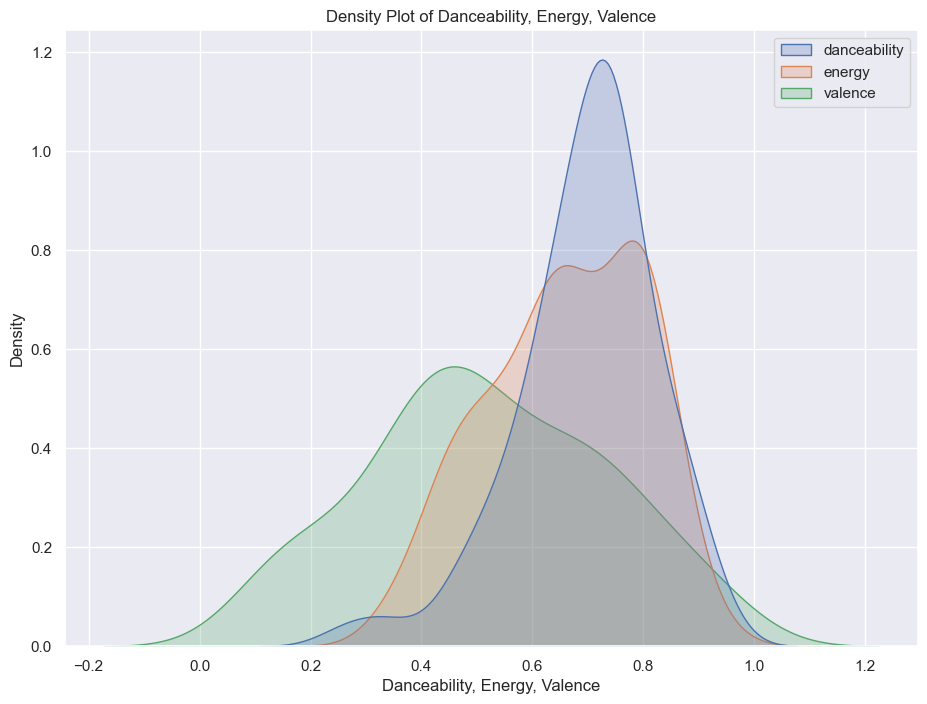

In [376]:
sns.kdeplot(data=features_df[['danceability', 'energy', 'valence']], fill=True).set\
(title='Density Plot of Danceability, Energy, Valence', xlabel='Danceability, Energy, Valence', ylabel='Density');

Since these three features are postively correlated we can see the density distrubtion plot looks similar between the features. 

In [ ]:
# data = ranking_spotify_1[ranking_spotify_1.title.isin(ranking_spotify_1.groupby('title').agg([np.median])['Position'].sort_values(by='median').head(10).index.tolist())]
# ax2 = sns.boxplot(x='Position', y='title', data=data)
# ax2 = plt.title('Sorted by Median Position')
# ax2 = plt.gca().invert_yaxis()
# ax2 = plt.ylabel('')

In [ ]:
# importance = sorted(best_model.coef_[0])
# for i,v in enumerate(importance):
#     print(i, v)
# plt.bar([x for x in range(len(importance))], importance)

In [ ]:
# importances = pd.DataFrame(data={'Attribute': features_df.columns, 
#                                  'Importance': importance, 
#                                  'Exp Coef': np.exp(importance)})
# importances = importances.sort_values(by='Importance', ascending=False)
# print(importances[:5])
# plt.bar(x=importances['Attribute'][:5], height=importances['Importance'][:5])
# plt.title('Feature Importances obtained from coefficents')
# plt.xticks(rotation='vertical')

# References

* [0] https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features 
* [1] https://en.wikipedia.org/wiki/Pitch_class 